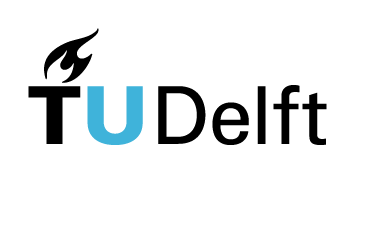
<h1 style="color:red">Please keep to the practical rules and the other educational rules and regulations</h1>

<h1>Practical Assignment I: Time-integration methods</h1>

<h2>Introduction</h2>

Within this assignment you will perform several steps, which will result in one single completed notebook. This notebook must be handed in through the correct Assignment within the course page of your own course.

<h3>Questions on the practical assignment</h3>

During the practical assignment you can __only__ ask questions using:
- the Brightspace Discussions on the course page of your course.
- the scheduled help sessions.

<h3>Intermediate automatic checks</h3>

Within this notebook several intermediate checks are indicated, which must be done in either __Grasple__ or __this notebook__. It is your own responsiblity to do these checks.

<h3>Programming</h3>

In this notebook a lot of example code is given. You only have to change the code that is between the lines
```python
    ''' start of lines to be changed '''
```
and
```python
    ''' end of lines to be changed '''
```

<h3>Steps to perform</h3>
In this assignment you will perform the following steps:
<ul>
    <li>Read the problem description;</li>
    <li>Collect information and formulate a model (Read the text below &amp; Sub-Assignment 0);</li>
    <li>Select an appropriate numerical method (Sub-Assignment 1);</li>
    <li>Implement the numerical method (Sub-Assignment 2);</li>
    <li>Select appropriate settings for the numerical method (Sub-Assignment 3);</li>
    <li>Answer the research question (Sub-Assignment 4);</li>
    <li>Submit this notebook in Brightspace for the final assessment (Sub-Assignment 5).</li>
</ul>
To be able to perform this practical assignment, knowledge and understanding of Chapter 6 of the course book are required.

<font size="-3">[C. Vuik, F.J. Vermolen, M.B. van Gijzen, M.J. Vuik, <em>Numerical Methods for Ordinary Differential Equations</em>, TU Delft Open Textbooks](https://textbooks.open.tudelft.nl/textbooks/catalog/book/57)</font>

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Problem description</h1>

Consider a closed lake containing two fish populations, $y_1(t)$ being a prey fish and $y_2(t)$ being a predator fish. The local authorities consider allowing for fishing on the prey fish $y_1$ during months $3$, $4$, $5$, $6$ and $7$ of each year. They want to investigate the effect of the fishing rate on the populations. They are interested in the maximum fishing rate $W_0$ such that the predator population $y_2$ does not drop below $100$ fish during the first $10$ years.

The main research question of this assignment is therefore:

> ### __*What is the highest value of $W_0$ such that $y_2(t)\geq100$ for $t\in[0,10]$?*__

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Model</h1>

In order to obtain a balanced scale between $y_1$ and $y_2$, the prey population $y_1$ is measured in units of $1000$ fish, while the predator population $y_2$ is in units of $1$ fish. A well-known model in this situation (Predator-Prey model or Volterra-Lotka model including harvesting (Schaefer model)) reads
$$
\left\{\begin{array}{rcl}
\dfrac{dy_1}{dt} & = & (a-A y_2)y_1-W(t)y_1, \\\\
\dfrac{dy_2}{dt} & = & (-c+C y_1)y_2,
\end{array}\right.
$$
with $W=W(t)$ the seasonal fishing load factor, which is given by
$$
W(t) = \left\{\begin{array}{rrcl}
W(t+1), & & t& <0, \\\\
0, & 0\leq & t & <\dfrac{3}{12}, \\\\
W_0, & \dfrac{3}{12}\leq & t & <\dfrac{8}{12}, \\\\
0, & \dfrac{8}{12}\leq & t & <1, \\\\
W(t-1), & 1\leq & t,
\end{array}\right.
$$
with time $t$ measured in years.

The initial populations $y_1(0)$ and $y_2(0)$ are assumed to be known:
$$
\begin{array}{rcl}
y_1(0) & = & 600, \\
y_2(0) & = & 1000.
\end{array}
$$

Furthermore, it is given that $0\leq W_0\leq 6$.

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Sub-Assignment 0</h1>

Within the above model the values for the parameters $a$, $c$, $A$ and $C$ are missing.

To obtain these values, please perform the following steps:

<h1 style="color:red">Obtain the values of $a$, $c$, $A$ and $C$ in Grasple using the Grasple Subject <em>Practical Assignment I - Sub-Assignment 0</em>.</h1>

Detailed steps:
- Go to [Brightspace](https://brightspace.tudelft.nl).
- Log in and go to the Brightspace page of your course.
- Go to Content and then the page of this practical assignment.
- Click on the link to Grasple presented there.
- Open the first Grasple Subject titled "Practical Assignment I - Sub-Assignment 0".
- Fill in the student number of one student in your group.
- Copy the shown values for $a$, $c$, $A$ and $C$.
- Finally:

<h1 style="color:red">Fill in the used student number and the values of $a$, $c$, $A$ and $C$ you obtained in the next cell:</h1>

In [1]:
# Code for Sub-Assignment 0

''' start of lines to be changed '''

student_number = 1174916
a = 1.0
c = 2.0
A = 1e-3
C = 5e-3

''' end of lines to be changed '''

# Check whether you filled in values
import sys
sys.path.append('.resources')
from test_practical_assignment_I import Test_subassignment0
from student_class import student_values
student = student_values(a,c,A,C)
Test_subassignment0(student)

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Sub-Assignment 1</h1>

In this assignment we want to use a time integration method with the following properties:
- The time integration method is *explicit*, because of the non-linearity of the problem;
- The time integration method has an *accuracy* of $\mathcal{O}(\Delta t^p)$ with $p\geq2$, as it should be accurate enough;
- The time integration method should allow time steps $\Delta t>0$ such that it is *stable* in the only non-zero equilibrium state for $W_0=0$, as unstable results do not seem realistic. See also Section 6.8 of the course book.

To select the appropriate method, consider the five time-integration methods discussed in the book of the course in Section 6.7.

<h1 style="color:red">Answer the following questions:</h1>

> ### *Which of the five methods is/are explicit and has/have an accuracy of $\mathcal{O}(\Delta t^p)$ with $p\geq2$? Give details and arguments.*

> ### *What is the equilibrium state $\begin{pmatrix}y_{1,\rm eq}\\y_{2,\rm eq}\end{pmatrix}$ for $W_0=0$ and of what stability type is this equilibrium state? Give details and arguments.*

> ### *For all methods yet under consideration: is there an appropriate upper bound for the time step such that the method satisfies the demanded stability properties? If such a bound exists, determine it exactly.If such a bound does not exist, give an explanation. Give details and arguments.*

> ### *Which of the five methods should finally be chosen for the numerical simulations? Give details and arguments.*

<h2>You need to do the necessary calculations and explain your answers!</h2>

<h1 style="color:red">Verify your answers in Grasple using the Grasple Test <em>Practical Assignment I - Sub-Assignment 1</em>.</h1>

<h1 style="color:red">Give your verified answers by completing the Markdown code cells below.</h1>

You can use Markdown and $\LaTeX$ in your answer. For more information, see:

- Markdown: https://daringfireball.net/projects/markdown/

- $\LaTeX$: https://www.latex-project.org/

<h1>Results for Sub-Assignment 1</h1>

<h2>Candidate time-integration method(s) based on computational effort and accuracy</h2>

The five time-integration methods considered are:
- Forward Euler method
- Backward Euler method
- Trapezoidal method
- Modified Euler method
- RK4 method

Of these five methods the following method(s) can be used:
- Modified Euler method
- RK4 method

Because these are the only methods that are explicit and have an order of at minimum 2.

<h2>Equilibrium state</h2>

Setting $\frac{dy_1}{dt}=0$ and $\frac{dy_2}{dt}=0$ in the system of differential equations and solving for $y_1$ and $y_2$ results in the equilibrium

$$
\begin{pmatrix}y_{1,\rm eq}\\y_{2,\rm eq}\end{pmatrix}=\begin{pmatrix}\frac{c}{C}\\\frac{a}{A}\end{pmatrix}.
$$

The Jacobian of the system evaluated at this equilibrium has the eigenvalues
$$
\lambda_1=\overline{\lambda}_2=i\sqrt{ac},
$$
which makes the equilibrium point a (stable) center/circle point and solutions near this point should be spiraling around this point.

<h2>Appropriate upper bound for the time step</h2>

<h3>Modified Euler method</h3>

Beacuse the eigenvalues are purely imaginary, it can be concluded from the stability region of the Modified Euler method that there is no time step $\Delta t>0$ such that the Modified Euler method is stable.

<h3>RK4 method</h3>

Beacuse the eigenvalues are purely imaginary, it can be concluded from the stability region of the RK4 method that there is a time step $\Delta t>0$ such that the RK4 method is stable.

Three appropriate upper bounds can be used. First the exact upper bound can be used, stated as
$$
|Q(\lambda_i\Delta t)|\leq1,\text{ for }  i=1,2,
$$
with $Q$ the amplicfication factor of the RK4 method. Solving this inequality (using a computer), results in the upper bound
$$
\Delta t \leq \frac{2\sqrt{2}}{\sqrt{ac}}.
$$
The second option is using the $2.8$-rule, which results in
$$
\Delta t \leq \frac{2.8}{\sqrt{ac}}.
$$
Finally the $2.5$-rule can be used:
$$
\Delta t \leq \frac{2.5}{\sqrt{ac}}.
$$

<h2>Final choice for time-integration method</h2>

Because only the RK4 method satisfies all set demands and allows stable numerical results, this is the method of choice.

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Sub-Assignment 2</h1>

For now, we select $\Delta t=0.5$ and $W_0=2$. (Please note that this value for $\Delta t$ does not imply that an appropriate upper bound is larger than this value.) Run a simulation for $t\in[0,5]$.

<h1 style="color:red">Adapt, extend and use the code in the next cells such that it implements the method you selected and verified in Sub-Assignment 1.</h1>

<h2>There are three code cells below, each with there own target use:</h2>

1. A cell for programming the needed functions and setting the settings.

2. A cell where you can test and run your functions and settings.

3. A cell where we check you code.

<h1 style="color:red">Your code and answers will be verified automatically in the last cell and the result will be shown on screen.</h1>

<h2>Code cell for functions and settings</h2>

In [2]:
# Code for Sub-Assignment 2

# import extra modules/functions
import numpy as np

# Define the  right-hand side function
def RightHandSide(t_val, y_val, a,c,A,C,W_0):
    # INPUT
    # t_val: the value of the time t at which the right-hand side function will be evaluated.
    # y_val: the value of the vector y of dependent variables  at which the right-hand side function will be evaluated,
    #        which we assume contains v as the first value, and H_S as the second value at time t_val.
    # a: the value of the parameter a to use within this function.
    # c : The value of parameter c to use within this function.
    # A : The value of parameter A to use within this function.
    # C : The value of parameter C to use within this function.
    # W_0 : The value of parameter W_0 to use within this function.

    # OUTPUT
    # f: the vector containing the values of the right-hand side of the system of d.e.'s at t_val and y_val
    
    # extract the values of y_1 and y_2 from y_val
    y_1 = y_val[0]
    y_2 = y_val[1]
    
    ''' start of lines to be changed '''
    
    t = np.mod(t_val,1)
    if (t >= 3/12) and (t < 8/12):
        W = W_0
    else:
        W = 0
    
    f_1 = (a-A*y_2)*y_1-W*y_1
    f_2 = (-c+C*y_1)*y_2
          
    ''' end of lines to be changed '''
    
    # build f
    f = np.array([f_1, f_2])
    
    return f

# Define one step of the time-integration method
def SingleTimeStep(t_n, w_n, Dt, a,c,A,C,W_0):
    # INPUT
    # t_n: the time at which the numerical solution w_n is known within this function.
    # w_n: the known numerical solution to be used within this function.
    # Dt: the time step to be used within this function.
    # a: the value of the parameter a to use within this function.
    # c : The value of parameter c to use within this function.
    # A : The value of parameter A to use within this function.
    # C : The value of parameter C to use within this function.
    # W_0 : The value of parameter W_0 to use within this function.

    # OUTPUT
    # w_nplus1: the numerical solution at time t_n + Dt in a numpy array

    ''' start of lines to be changed '''

#     # You can perform one evaluation of the right-hand side function with the following line:
#     f_num = RightHandSide(t_n, w_n, a,c,A,C,W_0)
    
    k1 = Dt*RightHandSide(t_n, w_n, a,c,A,C,W_0)
    k2 = Dt*RightHandSide(t_n+0.5*Dt, w_n+0.5*k1, a,c,A,C,W_0)
    k3 = Dt*RightHandSide(t_n+0.5*Dt, w_n+0.5*k2, a,c,A,C,W_0)
    k4 = Dt*RightHandSide(t_n+Dt, w_n+k3, a,c,A,C,W_0)
    w_nplus1 = w_n+1/6*(k1+2*k2+2*k3+k4)
       
    ''' end of lines to be changed '''

    return w_nplus1

# Define the entire time-integration method
def TimeIntegrationMethod(t_0, t_end, Dt, y_0, a,c,A,C,W_0):
    # INPUT
    # t_0: the time at which the numerical simulation should start to use within this function.
    # t_end: the time at which the numerical simulation should end to use within this function.
    # Dt: the time step to be used in the numerical simulation to use within this function.
    # y_0: the known initial condition at time t_0 to use within this function.
    # a: the value of the parameter a to use within this function.
    # c : The value of parameter c to use within this function.
    # A : The value of parameter A to use within this function.
    # C : The value of parameter C to use within this function.
    # W_0 : The value of parameter W_0 to use within this function.

    # OUTPUT
    # t_num: an array containing all numerical times at which a numerical solution has been calculated
    # w_num: an array containing all calculated numerical solutions.
    #        w_num[:,j] corresponds to the numerical solution at time t_num[j]

    # calculate the number of time steps to take
    N = int(np.round((t_end - t_0) / Dt))

    # create t_num
    t_num = np.linspace(t_0, t_end, num=N + 1)

    # Allocate memory for the approximations
    w_num = np.zeros((y_0.size, N + 1))

    # store the (given) initial value
    w_num[:, 0] = y_0

    # Perform all time steps
    for n, t_n in enumerate(t_num[:-1]):  # last time is not included
        # perform one time step
        w_num[:, n + 1] = SingleTimeStep(t_n, w_num[:, n], Dt, a,c,A,C,W_0)
        
    return t_num, w_num

# Set the information needed to perform the numerical simulation

# define the time interval on which the numerical simulations should be performed
t_0 = 0.0
t_end = 5.0

# define the time step which should be used in the numerical simulation
Dt = 0.5

# define the known initial condition
y_1 = 600
y_2 = 1000
y_0 = np.array([y_1,y_2]) # Combine the initial conditions into one array

# define the value of the parameter W_0
W_0 = 2

<h2>Code cell for testing your code yourself</h2>

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
# Do whatever you want in this cell. Please make sure everything works as it should.
# You can print and plot if need be.
# You can run the main simulation using the next line:
t_num, w_num = TimeIntegrationMethod(t_0, t_end, Dt, y_0, a,c,A,C,W_0)
plt.figure(2)
plt.plot(t_num,w_num.T)
plt.show()
print(t_num,'\n',w_num)

<h2>Code cell for automatic code verification</h2>

In [4]:
# The code below tests your code and returns whether it works properly.
# If the code does not work properly, you will receive tips what might be wrong.
# If the code does work properly, a tabel with the results of the simulation will be shown.
from test_practical_assignment_I import Test_subassignment2
student = student_values(a,c,A,C,RightHandSide=RightHandSide,SingleTimeStep=SingleTimeStep,TimeIntegrationMethod=TimeIntegrationMethod)
Test_subassignment2(student)

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Sub-Assignment 3</h1>

For now, we select $W_0=0.01$.

To have an accurate estimate for $W_0$, the errors in your solutions should not be too large and you need to determine an appropriate time step $\Delta t$.

Given $W_0=0.01$ and some time step $\Delta t$, you can estimate the global truncation errors $e(t,\Delta t)$ at $t=1$ using the techniques from Section 6.9 from the course book (read carefully and every sentence). If we take $\Delta t=0.25$ and keep dividing $\Delta t$ by $2$ until the absolute value of the estimated global truncation errors in $y_1(1)$ and $y_2(1)$ are smaller or equal to $10^{-3}$, we can find the largest time step $\Delta t$ such that the errors are not too large.

<h1 style="color:red">Adapt, extend and use the code in the next cells to answer the following question:</h1>

> ### *What is the largest time step $\Delta t$, where $\Delta t$ is $0.25$ times a non-negative power of $\frac12$, such that the absolute value of the estimated global truncation errors in $y_1(1)$ and $y_2(1)$ with $W_0=0.01$ are smaller or equal to $10^{-3}$?*

<h2>There are three code cells below, each with there own target use:</h2>

1. A cell for programming the needed functions and setting the settings

2. A cell where you can test and run your functions and settings

3. A cell where we check you code.

<h1 style="color:red">Your code and answers will be verified automatically in the last cell and the result will be shown on screen.</h1>

<h2>Code cell for functions and settings</h2>

In [5]:
# Code for Sub-Assignment 3

# import extra modules/functions

# Define a function that calculates the estimated global truncation errors
def EstimateError(t_0,t_end,Dt,y_0, a,c,A,C,W_0):
    # INPUT
    # t_0: the time at which the numerical simulation should start to use within this function.
    # t_end: the time at which the numerical simulation should end to use within this function.
    # Dt: the time step to be used in the numerical simulation to use within this function.
    # y_0: the known initial condition at time t_0 to use within this function.
    # a: the value of the parameter a to use within this function.
    # c : The value of parameter c to use within this function.
    # A : The value of parameter A to use within this function.
    # C : The value of parameter C to use within this function.
    # W_0 : The value of parameter W_0 to use within this function.
    
    # OUTPUT
    # est_global_error: the estimated global truncation error at time t_end for all variables of the problem.
    #                   This should be NUMPY array of the same size as y_0.
    

    ''' start of lines to be changed '''
    
    ''' YOU CAN CHANGE ANYTHING HERE '''
    ''' JUST MAKE SURE THE OUTPUT MATCHES THE ABOVE DEFINITIONS '''
    
#     # You can perform one single numerical simulation with the following line:
#     t_num, w_num = TimeIntegrationMethod(t_0,t_end,Dt,y_0, a,c,A,C,W_0)
    
    _ , w_fine = TimeIntegrationMethod(t_0,t_end,Dt,y_0, a,c,A,C,W_0)
    _ , w_course = TimeIntegrationMethod(t_0,t_end,2*Dt,y_0, a,c,A,C,W_0)
    
    est_global_error = (w_fine[:,-1]-w_course[:,-1])/15
           
    ''' end of lines to be changed '''
    
    return est_global_error

# Define a function that determines the largest Dt for which the estimated global truncation errors satisfy a given bound
# also returns all used time steps and calculated errors in two arrays
def DetermineTimeStep(t_0,t_end,Dt_start,y_0,bound,EstimateError, a,c,A,C,W_0):
    # INPUT
    # t_0: the time at which the numerical simulation should start
    # t_end: the time at which the numerical simulation should end
    # Dt_start: the first time step to be considered
    # y_0: the known initial condition at time t_0     
    # bound: the bound below which the estimated global truncation error must lie
    # EstimateError: The function used to estimate the errors.
    # a: the value of the parameter a to use within this function.
    # c : The value of parameter c to use within this function.
    # A : The value of parameter A to use within this function.
    # C : The value of parameter C to use within this function.
    # W_0 : The value of parameter W_0 to use within this function.
    
    # OUTPUT
    # Dt_opt: the largest Dt for which the estimated global truncation error satisfies a given bound
    # Dt_list: all considered Dt's. This should be a NUMPY array.
    # err_list: all calculated estimated global truncation errors. err_list[:,i] should correspond with Dt_list[i].
    #           This should be a NUMPY array with as many rows as those of y_0.
    #           The last element of Dt_list is the largest Dt for which the estimated global truncation error satisfies
    #           a given bound.
    
    ''' start of lines to be changed '''
    
    ''' YOU CAN CHANGE ANYTHING HERE '''
    ''' JUST MAKE SURE THE OUTPUT MATCHES THE ABOVE DEFINITIONS '''
    
#     # You can estimate one global truncation error with the following line:
#     global_trunction_error = EstimateError(t_0,t_end,Dt,y_0, a,c,A,C,W_0)

    Dt_list = [Dt_start]
    err_list = [EstimateError(t_0,t_end,Dt_list[-1],y_0, a,c,A,C,W_0)]
    
    while np.any(np.abs(err_list[-1])>bound):
        Dt_list.append(Dt_list[-1]/2)
        err_list.append(EstimateError(t_0,t_end,Dt_list[-1],y_0, a,c,A,C,W_0))
    
    Dt_list = np.array(Dt_list)
    err_list = np.array(err_list).T
    Dt_opt = Dt_list[-1]
    
    ''' end of lines to be changed '''
    
    return Dt_opt, Dt_list, err_list

# Set the information needed to perform the numerical optimization

# define the time interval on which the numerical optimization should be performed
t_0 = 0
t_end = 1.0

# define the first time step which should be used in the numerical optimization
Dt_start = 0.25

# define the value of the parameter W_0
W_0 = 0.01

# define the bound for the global truncaction error in the numerical optimization
bound = 1e-3

<h2>Code cell for testing and running your code yourself</h2>

In [6]:
# Do whatever you want in this cell. Please make sure everything works as it should.
# You can print and plot if need be.
# You can run the main optimisation using the next line:
Dt_opt, Dt_list, err_list = DetermineTimeStep(t_0,t_end,Dt_start,y_0,bound,EstimateError, a,c,A,C,W_0)
plt.figure(3)
plt.loglog(Dt_list,np.abs(err_list.T))
plt.show()
print(Dt_opt,'\n',Dt_list,'\n',err_list)

<h2>Code cell for automatic code verification</h2>

In [7]:
# The code below tests your code and returns whether it works properly.
# If the code does not work properly, you will receive tips what might be wrong.
# If the code does work properly, a tabel and a figure with the results of the simulation will be shown.
from test_practical_assignment_I import Test_subassignment3
student = student_values(a,c,A,C,EstimateError=EstimateError,DetermineTimeStep=DetermineTimeStep,TimeIntegrationMethod=TimeIntegrationMethod)
Dt_opt = Test_subassignment3(student)

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Sub-Assignment 4</h1>

Using the value for $\Delta t$ you found in the previous assignment (by reusing its value automatically), answer the research question. That is,

<h1 style="color:red">Adapt, extend and use the code in the next cell to answer the following question:</h1>

> ### __*What is the highest value of $W_0$ such that $y_2(t)\geq100$ for $t\in[0,10]$?*__

<h1 style="color:red">Determine your answer for $W_0$ exact to 2 decimals (i.e. limit the considered values to multiples of  $0.01$).</h1>

<h1 style="color:red">You may assume that the behavior of the system is a little bit predictable as the value $W_0$ of changes. Use the pictures above to get an idea of this predictability.</h1>

<h1 style="color:red">Your code should run independent of the settings/input.</h1>

<h2>There are three cells below, each with there own target use:</h2>

1. A code cell for programming the needed functions and setting the settings

2. A code cell where you can test and run your functions and settings

3. A code cell where your code is run by us and some output is generated.

<h1 style="color:red">Your code and answers will be verified automatically in the last cell and the result will be shown on screen.</h1>

<h2>Code cell for functions and settings</h2>

In [8]:
# Define a function that determines the answer to research question with supporting output
def AnswerResearchQuestion(t_0,t_end,Dt,y_0,a,c,A,C):
    # INPUT
    # t_0: the time at which the numerical simulation should start
    # t_end: the time at which the numerical simulation should end
    # Dt: the time step to be used
    # y_0: the known initial condition at time t_0 
    # a: the value of the parameter a to use within this function.
    # c : The value of parameter c to use within this function.
    # A : The value of parameter A to use within this function.
    # c: The value of parameter C to use within this function.
    
    # OUTPUT
    # W_0_opt: the optimal W_0
    #          this should be a number
    # W_0_list: all used W_0 values in your code.
    #           This should be a NUMPY array with one dimension.
    #           W_0_opt must be part of this array.
    # extra_output: Fill this variable with useful information that supports your research answer.
    #               DO NOT PUT TO MUCH INFORMATION IN THIS VARIABLE, as that is useless.
    #               extra_output[i,:] should correspond with D_S_list[i].
    #               This should be a NUMPY array with 1 or 2 dimensions.
    #               This variable must contain at least one column and try to keep the number of columns below 5.
    #               Each column must mean something related to the research question.
    #               A plot of extra_output[:,j] versus W_0_list must make sense
    #                  and should be useful in an article to support your value for W_0_opt
    # extra_names: a LIST of STRINGS with the names of the extra output you generated.
    #              extra_names[j] should correspond with the data in extra_output[:,j].
    
    ''' start of lines to be changed '''
    
    ''' YOU CAN CHANGE ANYTHING HERE '''
    ''' JUST MAKE SURE THE OUTPUT MATCHES THE ABOVE DEFINITIONS '''
    
    # Observation from figures: minimum value for y_2 goes down as W_0 goes up.
    # Searching for largest W_0, so that minimum of y_2 is above 100.
    # Solution: Start with steps of -1 from 6 and stop at 0 or if >100 is found
    
    W_0_list = [6]
    _,w_num = TimeIntegrationMethod(t_0,t_end,Dt,y_0, a,c,A,C,W_0_list[-1])
    y_2_min = [np.min(w_num[1,:])]
    while y_2_min[-1]<100:
        W_0_list.append(W_0_list[-1]-1.0)
        _,w_num = TimeIntegrationMethod(t_0,t_end,Dt,y_0, a,c,A,C,W_0_list[-1])
        y_2_min.append(np.min(w_num[1,:]))
        if np.abs(W_0_list[-1])<0.01/2:
            break
    if len(W_0_list)>1:
        W_0_list.pop()
        y_2_min.pop()
    while y_2_min[-1]<100:
        W_0_list.append(W_0_list[-1]-0.1)
        _,w_num = TimeIntegrationMethod(t_0,t_end,Dt,y_0, a,c,A,C,W_0_list[-1])
        y_2_min.append(np.min(w_num[1,:]))
        if np.abs(W_0_list[-1])<0.01/2:
            break
    if len(W_0_list)>1:
        W_0_list.pop()
        y_2_min.pop()
    while y_2_min[-1]<100:
        W_0_list.append(W_0_list[-1]-0.01)
        _,w_num = TimeIntegrationMethod(t_0,t_end,Dt,y_0, a,c,A,C,W_0_list[-1])
        y_2_min.append(np.min(w_num[1,:]))
        if np.abs(W_0_list[-1])<0.01/2:
            break
    W_0_opt = W_0_list[-1]
    
    W_0_list = np.array(W_0_list)
    extra_output = np.array(y_2_min)
    extra_names = ['y_2_min']
    
    ''' end of lines to be changed '''
    
    # make sure that extra_output has 2 dimensions (if it is a numpy array)
    if isinstance(extra_output,type(np.array([]))):
        if len(extra_output.shape)<2:
            extra_output = extra_output.reshape((-1,1))
    
    return W_0_opt, W_0_list, extra_output, extra_names

# Set the information needed to perform the numerical optimization

# define the time interval on which the numerical optimization should be performed
t_0 = 0
t_end = 10

# define the time step to be used
Dt = Dt_opt

<h2>Code cell for testing and running your code yourself</h2>

In [9]:
# Do whatever you want in this cell. Please make sure everything works as it should.
# You can print and plot if need be.
# You can run the main optimisation using the next line:
# W_0_opt, W_0_list, extra_output, extra_names = AnswerResearchQuestion(t_0,t_end,Dt_opt,y_0,a,c,A,C)
# plt.figure()
# for i in np.arange(len(extra_names)):
#     plt.plot(W_0_list,extra_output[:,i],'o',label=extra_names[i])
# plt.legend()
# plt.show()
# print(W_0_opt)
AnswerResearchQuestion(0.0,0.9,0.0003515625,np.array([ 600, 1000]),1.0,2.0,0.001,0.005)

<h2>Code cell for automatic run and output</h2>

In [10]:
# The code below runs your code and returns nicely formatted results.
# If the code gives an error or warning, you will be notified.
# If the code does work properly, a figure with the results of the simulation will be shown.
from test_practical_assignment_I import Test_subassignment4
student = student_values(a,c,A,C,Dt_opt=Dt_opt,TimeIntegrationMethod=TimeIntegrationMethod,AnswerResearchQuestion=AnswerResearchQuestion)
Test_subassignment4(student)

<hr style="border: 25px solid #00A6D6;border-radius: 10px">

<h1>Sub-Assignment 5</h1>

<h1 style="color:red">Rerun the entire notebook and make sure all answers are still correct and no errors occur.</h1>

<h1 style="color:red">Download the notebook.</h1>

<h1 style="color:red">Submit it in Brightspace in the Assignment <em>Practical Assignment I</em> for the final assessment.</h1>
